In [ ]:
!pip install pydub
!apt install ffmpeg -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [5]:
from google.colab import files
uploaded = files.upload()


Saving output.ogg to output.ogg
Saving output_q2.mp3 to output_q2.mp3
Saving input.wav to input.wav


In [6]:
from pydub import AudioSegment
from scipy.io import wavfile
import numpy as np
import os

wav_path = "input.wav"
compressed_files = ["output_q2.mp3", "output.ogg"]

rate_wav, wav_data = wavfile.read(wav_path)
wav_data = wav_data.astype(np.float32) / 32768.0  # chuẩn hóa

def evaluate_quality(ref_data, test_data):
    min_len = min(len(ref_data), len(test_data))
    ref = ref_data[:min_len]
    test = test_data[:min_len]
    mse = np.mean((ref - test) ** 2)
    if mse == 0:
        psnr = float("inf")
    else:
        psnr = 10 * np.log10(1.0 / mse)  # MAX^2 = 1^2 = 1
    return mse, psnr

for audio_path in compressed_files:
    print(f"🎧 Đang so sánh với: {audio_path}")

    audio = AudioSegment.from_file(audio_path)
    audio = audio.set_frame_rate(rate_wav).set_channels(1).set_sample_width(2)
    temp_wav = "temp.wav"
    audio.export(temp_wav, format="wav")

    _, test_data = wavfile.read(temp_wav)
    test_data = test_data.astype(np.float32) / 32768.0

    mse, psnr = evaluate_quality(wav_data, test_data)
    print(f"🔸 MSE: {mse}")
    print(f"🔸 PSNR: {psnr:.2f} dB\n")

    os.remove(temp_wav)


🎧 Đang so sánh với: output_q2.mp3
🔸 MSE: 4.0024483496381436e-06
🔸 PSNR: 53.98 dB

🎧 Đang so sánh với: output.ogg
🔸 MSE: 1.9260571207269095e-05
🔸 PSNR: 47.15 dB



In [7]:
from pydub import AudioSegment
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt


chunk_duration = 1.0  # giây
compressed_files = ["output_q2.mp3", "output.ogg"]
wav_path = "input.wav"


rate_wav, wav_data = wavfile.read(wav_path)
wav_data = wav_data.astype(np.float32)


samples_per_chunk = int(rate_wav * chunk_duration)


def evaluate_chunkwise(ref_data, test_data, rate):
    num_chunks = min(len(ref_data), len(test_data)) // samples_per_chunk
    mse_list, psnr_list = [], []

    for i in range(num_chunks):
        start = i * samples_per_chunk
        end = start + samples_per_chunk
        ref = ref_data[start:end]
        test = test_data[start:end]
        mse = np.mean((ref - test) ** 2)
        psnr = 10 * np.log10((32767**2) / mse) if mse != 0 else float('inf')
        mse_list.append(mse)
        psnr_list.append(psnr)

    return mse_list, psnr_list


for file in compressed_files:
    print(f"\n🎧 Đang xử lý: {file}")
    audio = AudioSegment.from_file(file)
    audio = audio.set_frame_rate(rate_wav).set_channels(1).set_sample_width(2)
    audio.export("temp.wav", format="wav")

    rate_test, test_data = wavfile.read("temp.wav")
    test_data = test_data.astype(np.float32)

    mse_list, psnr_list = evaluate_chunkwise(wav_data, test_data, rate_wav)


    for i, (mse, psnr) in enumerate(zip(mse_list, psnr_list)):
        print(f"🧩 Đoạn {i+1}: MSE = {mse:.2f} | PSNR = {psnr:.2f} dB")





🎧 Đang xử lý: output_q2.mp3
🧩 Đoạn 1: MSE = 824.10 | PSNR = 61.15 dB
🧩 Đoạn 2: MSE = 2883.16 | PSNR = 55.71 dB
🧩 Đoạn 3: MSE = 9648.74 | PSNR = 50.46 dB
🧩 Đoạn 4: MSE = 335.62 | PSNR = 65.05 dB
🧩 Đoạn 5: MSE = 509.93 | PSNR = 63.23 dB
🧩 Đoạn 6: MSE = 786.92 | PSNR = 61.35 dB
🧩 Đoạn 7: MSE = 1725.75 | PSNR = 57.94 dB
🧩 Đoạn 8: MSE = 957.18 | PSNR = 60.50 dB
🧩 Đoạn 9: MSE = 1079.55 | PSNR = 59.98 dB
🧩 Đoạn 10: MSE = 870.85 | PSNR = 60.91 dB
🧩 Đoạn 11: MSE = 388.48 | PSNR = 64.42 dB
🧩 Đoạn 12: MSE = 408.19 | PSNR = 64.20 dB
🧩 Đoạn 13: MSE = 179.53 | PSNR = 67.77 dB
🧩 Đoạn 14: MSE = 399.64 | PSNR = 64.29 dB
🧩 Đoạn 15: MSE = 1894.35 | PSNR = 57.53 dB
🧩 Đoạn 16: MSE = 410.85 | PSNR = 64.17 dB
🧩 Đoạn 17: MSE = 495.18 | PSNR = 63.36 dB
🧩 Đoạn 18: MSE = 1671.13 | PSNR = 58.08 dB
🧩 Đoạn 19: MSE = 1340.10 | PSNR = 59.04 dB
🧩 Đoạn 20: MSE = 1886.41 | PSNR = 57.55 dB
🧩 Đoạn 21: MSE = 163.00 | PSNR = 68.19 dB
🧩 Đoạn 22: MSE = 2124.63 | PSNR = 57.04 dB
🧩 Đoạn 23: MSE = 542.95 | PSNR = 62.96 dB
🧩 Đoạ

Đang xử lý: output_q2.mp3
Đang xử lý: output.ogg


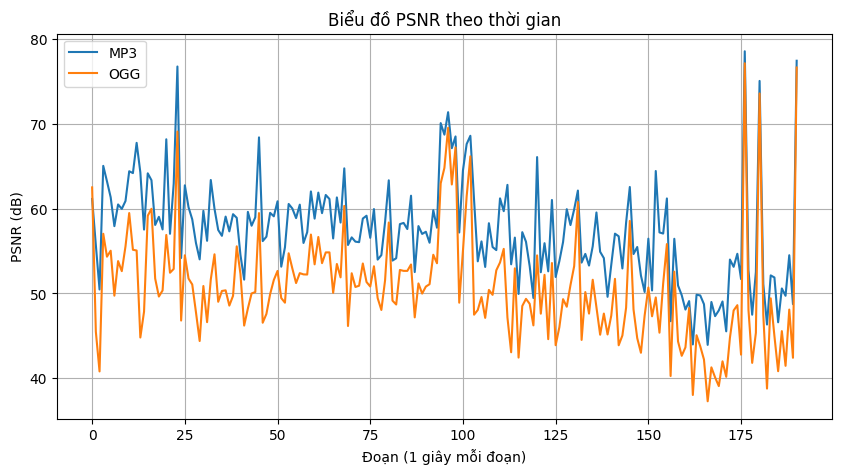

In [8]:
from pydub import AudioSegment
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt


chunk_duration = 1.0  # chia đoạn mỗi 1 giây
compressed_files = ["output_q2.mp3", "output.ogg"]
labels = ["MP3", "OGG"]
wav_path = "input.wav"


rate_wav, wav_data = wavfile.read(wav_path)
wav_data = wav_data.astype(np.float32)

samples_per_chunk = int(rate_wav * chunk_duration)


def evaluate_chunkwise(ref_data, test_data):
    num_chunks = min(len(ref_data), len(test_data)) // samples_per_chunk
    psnr_list = []

    for i in range(num_chunks):
        start = i * samples_per_chunk
        end = start + samples_per_chunk
        ref = ref_data[start:end]
        test = test_data[start:end]
        mse = np.mean((ref - test) ** 2)
        psnr = 10 * np.log10((32767**2) / mse) if mse != 0 else float('inf')
        psnr_list.append(psnr)

    return psnr_list


all_psnr = []

for file in compressed_files:
    print(f"Đang xử lý: {file}")
    audio = AudioSegment.from_file(file)
    audio = audio.set_frame_rate(rate_wav).set_channels(1).set_sample_width(2)
    audio.export("temp.wav", format="wav")

    _, test_data = wavfile.read("temp.wav")
    test_data = test_data.astype(np.float32)

    psnr = evaluate_chunkwise(wav_data, test_data)
    all_psnr.append(psnr)


plt.figure(figsize=(10, 5))
for i, psnr in enumerate(all_psnr):
    plt.plot(psnr, label=labels[i])

plt.title("Biểu đồ PSNR theo thời gian")
plt.xlabel("Đoạn (1 giây mỗi đoạn)")
plt.ylabel("PSNR (dB)")
plt.legend()
plt.grid(True)
plt.show()
